### Reajustando Base de Dados pelos dividendos

Falta:

- Pegar os eventos direto da b3 para reajustar base (talvez isso fazer em um segundo vídeo)
    - Mostrar que lá especifica quanto é dividendo e quanto é jcp (precisa somar os dois)
- usar quantmod ou outro? No yahoo já acho bom pq tem os dividendos
- Mostrar no excel também
- Mostrar para Leandro se está tudo certo
- [x] Criar função para pegar os dividendos


### Ajustar recebimento de dividendo no preço da ação
Preparar estrutura (em mais de um vídeo e sendo curtos)
Vídeo:
    - [ ] Linkar repositório e artigo do medium se houver
Repositório:
    - [ ] Colocar Read.me
Artigo?
    - [ ] Colocar no medium

Conteúdo:
- O que são dividendos? (Eventos que afetam o valor da ação)
    Diferença de jcp e dividendos (Na prática para o ajuste soma os dois)
        Extra - Outro vídeo só disso?De qualquer forma falar rápido | Bonificação
            Ainda, diferença de direito de subscrição e bonus de subscrição

- Bonificação/ subscrição não entra na conta? Perguntar Leandro

- Mostrar Diferença de uma base ajustada só subtraindo e com o ratio (ver de preferência uma ação que fica negativa ITSA, talvez)

- Não é só subtrair o valor do dividendo da ação
- Preciso multiplicar o valor de fechamento por um fator de ajuste:
    - Fator de ajuste = (Preço de fechamento data com - dividendo)/fechamento na data com, ou
    - Fator de ajuste = Preço de fechamento ajustado / Preço de fechamento não ajustado

- Pegar o valor do fator ou calcular o fator com base no dividendo que é mostrado na tela de eventos corporativos da b3
- Pegar do yahoo finance e usar o actions = True
- E quando tem juros sobre capital próprio? Os dois no mesmo dia

- data ex, data com e data de pagamento

preço de exercício de opções também sofre ajuste!! Nunca tinha pensado nisso
    https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/consultas/mercado-a-vista/opcoes/ajuste-de-proventos/

- Split/ Inplit


linkedin



In [83]:
import yfinance as yf
import pandas as pd
import numpy as np

In [84]:
stock = yf.download("CIEL3.SA", actions=True)
stock

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2009-06-29,8.539906,8.715728,8.288733,8.424367,5.100185,340657037,0.000000,0.0
2009-06-30,8.484648,8.590141,8.364085,8.464554,5.124515,91353899,0.000000,0.0
2009-07-01,8.600188,9.072395,8.575071,8.956855,5.422558,81824638,0.000000,0.0
2009-07-02,8.791080,9.057324,8.700658,9.052301,5.480344,52866196,0.000000,0.0
2009-07-03,9.062348,9.182911,8.951831,8.961878,5.425601,5594334,0.000000,0.0
...,...,...,...,...,...,...,...,...
2022-11-08,5.510000,5.580000,5.440000,5.480000,5.420871,19880600,0.000000,0.0
2022-11-09,5.460000,5.620000,5.370000,5.430000,5.371410,17566800,0.000000,0.0
2022-11-10,5.360000,5.360000,4.980000,5.120000,5.064755,27938000,0.000000,0.0


In [85]:
# Checando todos as datas com proventos
stock[stock['Dividends'] != 0]

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2010-03-15,7.284038,7.334273,7.108216,7.133334,4.320671,6537506,0.003617,0.0
2010-09-15,7.464883,7.520141,7.414648,7.520141,4.557941,7884383,0.005085,0.0
2011-03-15,6.781690,6.992676,6.661127,6.982629,4.420682,10419481,0.309564,0.0
2011-09-16,8.770978,8.841306,8.750884,8.770978,5.558442,6442758,0.008898,0.0
2012-03-16,12.056327,12.174881,11.969923,11.969923,7.741797,6006804,0.245700,0.0
2012-09-14,14.120370,14.202353,13.746624,14.197530,9.367591,13889802,0.275548,0.0
2013-03-14,13.744212,13.925057,13.611593,13.840663,9.140796,16198548,0.013247,0.0
2013-09-16,16.495949,16.825809,16.362846,16.739004,11.264676,10921305,0.309651,0.0
2014-03-17,19.233217,19.357637,19.103008,19.314236,13.232013,4313433,0.337243,0.0


In [ ]:
[12:00] Silveira, Victoria (Associated)
    .loc
iloc
(pandas)
​[12:00] Silveira, Victoria (Associated)
    apply(lambda x:...
​[12:00] Silveira, Victoria (Associated)
    applymap(lambda:
​[12:01] Silveira, Victoria (Associated)
    map(lambda x: x+1, iterator)
​[12:01] Silveira, Victoria (Associated)
    list(map(...
​[12:02] Silveira, Victoria (Associated)
    .pipe


In [166]:
import string

ponctuation = (string.punctuation)
ponctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [86]:
# Isso, ou já dou um shift na coluna de dividendos antes

# Usar map e comparar eficiência
pype

stock.loc[(stock['Dividends'] > 0, 'fator')] = (stock['Close'].shift(1) - stock['Dividends']) / stock['Close'].shift(1)
stock['fator'] = stock['fator'].shift(-1)
stock['fator'].fillna(method='bfill', inplace=True)
stock['fator'].fillna(1, inplace=True)
stock


# fazer tb, desloca a coluna de dividendo 1 pra cima e se dividendo > 0 faz o fator ser adj close / close, simples

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,fator
Date,,,,,,,,,
2009-06-29,8.539906,8.715728,8.288733,8.424367,5.100185,340657037,0.000000,0.0,0.999517
2009-06-30,8.484648,8.590141,8.364085,8.464554,5.124515,91353899,0.000000,0.0,0.999517
2009-07-01,8.600188,9.072395,8.575071,8.956855,5.422558,81824638,0.000000,0.0,0.999517
2009-07-02,8.791080,9.057324,8.700658,9.052301,5.480344,52866196,0.000000,0.0,0.999517
2009-07-03,9.062348,9.182911,8.951831,8.961878,5.425601,5594334,0.000000,0.0,0.999517
...,...,...,...,...,...,...,...,...,...
2022-11-08,5.510000,5.580000,5.440000,5.480000,5.420871,19880600,0.000000,0.0,0.989210
2022-11-09,5.460000,5.620000,5.370000,5.430000,5.371410,17566800,0.000000,0.0,0.989210
2022-11-10,5.360000,5.360000,4.980000,5.120000,5.064755,27938000,0.000000,0.0,0.989210


In [87]:
all_factors = stock['fator'].dropna().unique().tolist()
all_factors

[0.999516765367232,
 0.9993460932466764,
 0.9573539876756701,
 0.998999047321584,
 0.9798390692178454,
 0.980246280045656,
 0.9990516492210824,
 0.9813821530556041,
 0.9822924354484069,
 0.9829028057270303,
 0.9888323426379971,
 0.9924600433054328,
 0.991488051578813,
 0.9918024317149092,
 0.9960851979089302,
 0.993875592821297,
 0.9951605731768752,
 0.9841873664253551,
 0.995013356067263,
 0.9830031813929212,
 0.9930310534618723,
 0.9624385116545086,
 0.9955408731508748,
 0.9718020114584378,
 0.9936085953622837,
 0.9769692518753773,
 0.9943081502887132,
 0.987884999824943,
 0.98901662119566,
 0.9928275760584003,
 0.9995604409879076,
 0.9966445221146849,
 0.9979078378648005,
 0.9974853046251153,
 0.9987430183627364,
 0.9853913835210055,
 0.9986852380355308,
 0.990862318966875,
 0.9930275150289757,
 0.9884163185000738,
 0.960870852352614,
 0.9922163984512757,
 0.9840574706235871,
 0.9892099606963238,
 1.0]

In [88]:
#new_factors = []
#for factor in all_factors:
    #np.array(all_factors[all_factors.index(factor): ]) # tirar essa linha e fazer list comprehension?
    #new_factors.append(np.array(all_factors[all_factors.index(factor): ]).prod())

# Com list comprehension
new_factors = [np.array(all_factors[all_factors.index(factor): ]).prod() for factor in all_factors]

new_factors

[0.6054088273237781,
 0.6057015232769458,
 0.6060978547573462,
 0.6330969135344309,
 0.633731248525038,
 0.6467707488240012,
 0.6598043389604876,
 0.6604306588902674,
 0.6729597199561547,
 0.6850910132978425,
 0.6970078926482428,
 0.7048797481570758,
 0.7102348884590276,
 0.7163322718090984,
 0.7222529900138475,
 0.7250915800476353,
 0.7295597007159926,
 0.7331075209169533,
 0.7448861323831621,
 0.7486192299239927,
 0.7615633846303479,
 0.766907924959054,
 0.7968383597209527,
 0.8004074781972228,
 0.8236322509726097,
 0.8289302798073136,
 0.8484712064541541,
 0.853328222450743,
 0.8637930757142339,
 0.873385802829038,
 0.8796953508246063,
 0.8800821988865088,
 0.883045237653187,
 0.884896584781434,
 0.8871274400518656,
 0.8882439463818784,
 0.901412333450695,
 0.9025990363328319,
 0.9109227579407086,
 0.9173187491326752,
 0.9280692072392231,
 0.9658625870135631,
 0.9734394518384824,
 0.9892099606963238,
 1.0]

In [89]:
dict_factors = dict(zip(all_factors, new_factors))
dict_factors

{0.999516765367232: 0.6054088273237781,
 0.9993460932466764: 0.6057015232769458,
 0.9573539876756701: 0.6060978547573462,
 0.998999047321584: 0.6330969135344309,
 0.9798390692178454: 0.633731248525038,
 0.980246280045656: 0.6467707488240012,
 0.9990516492210824: 0.6598043389604876,
 0.9813821530556041: 0.6604306588902674,
 0.9822924354484069: 0.6729597199561547,
 0.9829028057270303: 0.6850910132978425,
 0.9888323426379971: 0.6970078926482428,
 0.9924600433054328: 0.7048797481570758,
 0.991488051578813: 0.7102348884590276,
 0.9918024317149092: 0.7163322718090984,
 0.9960851979089302: 0.7222529900138475,
 0.993875592821297: 0.7250915800476353,
 0.9951605731768752: 0.7295597007159926,
 0.9841873664253551: 0.7331075209169533,
 0.995013356067263: 0.7448861323831621,
 0.9830031813929212: 0.7486192299239927,
 0.9930310534618723: 0.7615633846303479,
 0.9624385116545086: 0.766907924959054,
 0.9955408731508748: 0.7968383597209527,
 0.9718020114584378: 0.8004074781972228,
 0.9936085953622837: 0.8

In [90]:
stock['fator'].replace(dict_factors, inplace=True)
stock

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,fator
Date,,,,,,,,,
2009-06-29,8.539906,8.715728,8.288733,8.424367,5.100185,340657037,0.000000,0.0,0.605409
2009-06-30,8.484648,8.590141,8.364085,8.464554,5.124515,91353899,0.000000,0.0,0.605409
2009-07-01,8.600188,9.072395,8.575071,8.956855,5.422558,81824638,0.000000,0.0,0.605409
2009-07-02,8.791080,9.057324,8.700658,9.052301,5.480344,52866196,0.000000,0.0,0.605409
2009-07-03,9.062348,9.182911,8.951831,8.961878,5.425601,5594334,0.000000,0.0,0.605409
...,...,...,...,...,...,...,...,...,...
2022-11-08,5.510000,5.580000,5.440000,5.480000,5.420871,19880600,0.000000,0.0,0.989210
2022-11-09,5.460000,5.620000,5.370000,5.430000,5.371410,17566800,0.000000,0.0,0.989210
2022-11-10,5.360000,5.360000,4.980000,5.120000,5.064755,27938000,0.000000,0.0,0.989210


In [91]:
primeiro_fator = (32.226646 - 0.405848) / 32.226646
primeiro_fator

0.9874064462060371

In [92]:
primeiro_fator * 32.270916	

31.864510483373543

In [93]:
# Comparando com o debaixo esse deve ser mais preciso
stock.loc['2022-11-10']['fator']

0.9892099606963238

In [94]:
fator = (26.040001 - 1.524102) / 26.040001
fator

0.9414707395748564

In [95]:
# Testando o ajuste do fator com o preço do dia 2022-11-09
26.040001 * fator

24.515899

In [96]:
# Pelo jeito deu bom
stock.insert(5, 'Ajustado', stock['Close'] * stock['fator'])
stock

,Open,High,Low,Close,Adj Close,ajustado,Volume,Dividends,Stock Splits,fator
Date,,,,,,,,,,
2009-06-29,8.539906,8.715728,8.288733,8.424367,5.100185,5.100186,340657037,0.000000,0.0,0.605409
2009-06-30,8.484648,8.590141,8.364085,8.464554,5.124515,5.124516,91353899,0.000000,0.0,0.605409
2009-07-01,8.600188,9.072395,8.575071,8.956855,5.422558,5.422559,81824638,0.000000,0.0,0.605409
2009-07-02,8.791080,9.057324,8.700658,9.052301,5.480344,5.480343,52866196,0.000000,0.0,0.605409
2009-07-03,9.062348,9.182911,8.951831,8.961878,5.425601,5.425600,5594334,0.000000,0.0,0.605409
...,...,...,...,...,...,...,...,...,...,...
2022-11-08,5.510000,5.580000,5.440000,5.480000,5.420871,5.420871,19880600,0.000000,0.0,0.989210
2022-11-09,5.460000,5.620000,5.370000,5.430000,5.371410,5.371410,17566800,0.000000,0.0,0.989210
2022-11-10,5.360000,5.360000,4.980000,5.120000,5.064755,5.064755,27938000,0.000000,0.0,0.989210


In [97]:
#stock.to_excel('stock4.xlsx')

In [98]:
stock['diff'] = round(stock['Adj Close'] - stock['ajustado'], 2)
stock['diff'].dropna().unique()
stock

,Open,High,Low,Close,Adj Close,ajustado,Volume,Dividends,Stock Splits,fator,diff
Date,,,,,,,,,,,
2009-06-29,8.539906,8.715728,8.288733,8.424367,5.100185,5.100186,340657037,0.000000,0.0,0.605409,-0.0
2009-06-30,8.484648,8.590141,8.364085,8.464554,5.124515,5.124516,91353899,0.000000,0.0,0.605409,-0.0
2009-07-01,8.600188,9.072395,8.575071,8.956855,5.422558,5.422559,81824638,0.000000,0.0,0.605409,-0.0
2009-07-02,8.791080,9.057324,8.700658,9.052301,5.480344,5.480343,52866196,0.000000,0.0,0.605409,0.0
2009-07-03,9.062348,9.182911,8.951831,8.961878,5.425601,5.425600,5594334,0.000000,0.0,0.605409,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-08,5.510000,5.580000,5.440000,5.480000,5.420871,5.420871,19880600,0.000000,0.0,0.989210,0.0
2022-11-09,5.460000,5.620000,5.370000,5.430000,5.371410,5.371410,17566800,0.000000,0.0,0.989210,-0.0
2022-11-10,5.360000,5.360000,4.980000,5.120000,5.064755,5.064755,27938000,0.000000,0.0,0.989210,0.0


In [99]:
stock[stock.index <= '2009-11-03']

,Open,High,Low,Close,Adj Close,ajustado,Volume,Dividends,Stock Splits,fator,diff
Date,,,,,,,,,,,
2009-06-29,8.539906,8.715728,8.288733,8.424367,5.100185,5.100186,340657037,0.0,0.0,0.605409,-0.0
2009-06-30,8.484648,8.590141,8.364085,8.464554,5.124515,5.124516,91353899,0.0,0.0,0.605409,-0.0
2009-07-01,8.600188,9.072395,8.575071,8.956855,5.422558,5.422559,81824638,0.0,0.0,0.605409,-0.0
2009-07-02,8.791080,9.057324,8.700658,9.052301,5.480344,5.480343,52866196,0.0,0.0,0.605409,0.0
2009-07-03,9.062348,9.182911,8.951831,8.961878,5.425601,5.425600,5594334,0.0,0.0,0.605409,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2009-10-27,8.364085,8.374132,7.937089,7.937089,4.805184,4.805184,14222824,0.0,0.0,0.605409,0.0
2009-10-28,7.987324,8.067700,7.680892,8.067700,4.884257,4.884257,11895949,0.0,0.0,0.605409,0.0
2009-10-29,8.338967,8.635352,8.188263,8.539906,5.170135,5.170134,10737786,0.0,0.0,0.605409,0.0


### Função

In [122]:
def reajuste_dividendos(df, col_dividendos='Dividends'):
    '''
    Função para reajustar os preços de fechamento de ações com dividendos.
    params:
        df: dataframe com os dados de ações
        col_dividendos: nome da coluna com os dividendos
    return:
        df: dataframe com os dados de ações reajustados
    '''
    df.loc[(df[col_dividendos] > 0, 'fator')] = (df['Close'].shift(1) - df[col_dividendos]) / df['Close'].shift(1)
    df['fator'] = df['fator'].shift(-1)
    df['fator'].fillna(method='bfill', inplace=True)
    df['fator'].fillna(1, inplace=True)
    all_factors = df['fator'].dropna().unique().tolist()
    new_factors = [np.array(all_factors[all_factors.index(factor): ]).prod() for factor in all_factors]
    dict_factors = dict(zip(all_factors, new_factors))
    df['fator'].replace(dict_factors, inplace=True)
    df.insert(5, 'Ajustado', df['Close'] * df['fator'])
    return df

In [123]:
cielo = yf.download("CIEL3.SA", actions=True)
cielo

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2009-06-29,8.539906,8.715728,8.288733,8.424367,5.100186,340657037,0.000000,0.0
2009-06-30,8.484648,8.590141,8.364085,8.464554,5.124516,91353899,0.000000,0.0
2009-07-01,8.600188,9.072395,8.575071,8.956855,5.422560,81824638,0.000000,0.0
2009-07-02,8.791080,9.057324,8.700658,9.052301,5.480343,52866196,0.000000,0.0
2009-07-03,9.062348,9.182911,8.951831,8.961878,5.425600,5594334,0.000000,0.0
...,...,...,...,...,...,...,...,...
2022-11-08,5.510000,5.580000,5.440000,5.480000,5.420871,19880600,0.000000,0.0
2022-11-09,5.460000,5.620000,5.370000,5.430000,5.371410,17566800,0.000000,0.0
2022-11-10,5.360000,5.360000,4.980000,5.120000,5.064755,27938000,0.000000,0.0


In [124]:
cielo_ajustado = reajuste_dividendos(cielo)
cielo_ajustado

,Open,High,Low,Close,Adj Close,Ajustado,Volume,Dividends,Stock Splits,fator
Date,,,,,,,,,,
2009-06-29,8.539906,8.715728,8.288733,8.424367,5.100186,5.100186,340657037,0.000000,0.0,0.605409
2009-06-30,8.484648,8.590141,8.364085,8.464554,5.124516,5.124516,91353899,0.000000,0.0,0.605409
2009-07-01,8.600188,9.072395,8.575071,8.956855,5.422560,5.422559,81824638,0.000000,0.0,0.605409
2009-07-02,8.791080,9.057324,8.700658,9.052301,5.480343,5.480343,52866196,0.000000,0.0,0.605409
2009-07-03,9.062348,9.182911,8.951831,8.961878,5.425600,5.425600,5594334,0.000000,0.0,0.605409
...,...,...,...,...,...,...,...,...,...,...
2022-11-08,5.510000,5.580000,5.440000,5.480000,5.420871,5.420871,19880600,0.000000,0.0,0.989210
2022-11-09,5.460000,5.620000,5.370000,5.430000,5.371410,5.371410,17566800,0.000000,0.0,0.989210
2022-11-10,5.360000,5.360000,4.980000,5.120000,5.064755,5.064755,27938000,0.000000,0.0,0.989210


## Comparando entre fator e simplesmente subtrair o dividendo

In [160]:
# Dá para tirar a linha que cria o dicionário e passar direto para o replace

def reajuste_dividendos_sub(df, col_dividendos='Dividends'):
    '''
    Função para reajustar os preços de fechamento de ações com dividendos usando subtração dos dividendos e não o ratio.
    params:
        df: dataframe com os dados de ações
        col_dividendos: nome da coluna com os dividendos
    return:
        df: dataframe com os dados de ações reajustados de forma errada
    '''
    df['Dividends'] = df['Dividends'].shift(-1, fill_value=0)
    df.loc[(df['Dividends'] > 0, 'fator')] = df['Dividends']
    df['fator'].fillna(method='bfill', inplace=True)
    df['fator'].fillna(0, inplace=True)
    all_factors = df['fator'].dropna().unique().tolist()
    new_factors = [np.array(all_factors[all_factors.index(factor): ]).sum() for factor in all_factors]
    dict_factors = dict(zip(all_factors, new_factors))
    df['fator'].replace(dict_factors, inplace=True)
    df.insert(5, 'Ajustado', df['Close'] - df['fator'])
    return df


In [161]:
stock = yf.download("ITSA4.SA", actions=True)
ajustado_sub = reajuste_dividendos_sub(stock).reset_index()
ajustado_sub = ajustado_sub[['Date', 'Close', 'Adj Close', 'Ajustado', 'fator']]
ajustado_sub

[*********************100%***********************]  1 of 1 completed


,Date,Close,Adj Close,Ajustado,fator
0,2000-01-03,1.032093,0.534622,-3.789333,4.821426
1,2000-01-04,0.933551,0.483577,-3.887875,4.821426
2,2000-01-05,1.011347,0.523876,-3.810079,4.821426
3,2000-01-06,1.026906,0.531935,-3.794520,4.821426
4,2000-01-07,1.021720,0.529249,-3.799706,4.821426
...,...,...,...,...,...
5742,2022-11-08,10.610000,10.610000,10.610000,0.000000
5743,2022-11-09,10.170000,10.170000,10.170000,0.000000
5744,2022-11-10,9.920000,9.920000,9.920000,0.000000
5745,2022-11-11,8.840000,8.840000,8.840000,0.000000


In [162]:
stock = yf.download("ITSA4.SA", actions=True)
ajustado = reajuste_dividendos(stock).reset_index()
ajustado = ajustado[['Date', 'Close', 'Adj Close', 'Ajustado', 'fator']]
ajustado

[*********************100%***********************]  1 of 1 completed


,Date,Close,Adj Close,Ajustado,fator
0,2000-01-03,1.032093,0.534622,0.535880,0.519217
1,2000-01-04,0.933551,0.483577,0.484716,0.519217
2,2000-01-05,1.011347,0.523875,0.525109,0.519217
3,2000-01-06,1.026906,0.531935,0.533187,0.519217
4,2000-01-07,1.021720,0.529249,0.530495,0.519217
...,...,...,...,...,...
5742,2022-11-08,10.610000,10.610000,10.610000,1.000000
5743,2022-11-09,10.170000,10.170000,10.170000,1.000000
5744,2022-11-10,9.920000,9.920000,9.920000,1.000000
5745,2022-11-11,8.840000,8.840000,8.840000,1.000000


In [163]:
# Comparando os dois - dá pra ver que se fosse só subtrair os dividendos o valor da ação estaria negativo

comp = pd.merge(ajustado, ajustado_sub, on=['Date', 'Close', 'Adj Close'], how='inner', suffixes=('_ratio', '_sub'))
comp

,Date,Close,Adj Close,Ajustado_ratio,fator_ratio,Ajustado_sub,fator_sub
0,2000-02-15,0.871315,0.451339,0.452402,0.519217,-3.950111,4.821426
1,2000-03-29,0.871315,0.451339,0.452402,0.519217,-3.950111,4.821426
2,2000-03-30,0.871315,0.451339,0.452402,0.519217,-3.950111,4.821426
3,2000-04-04,0.892060,0.462085,0.463173,0.519217,-3.929366,4.821426
4,2000-05-10,0.726095,0.376116,0.377001,0.519217,-4.095331,4.821426
...,...,...,...,...,...,...,...
875,2022-11-08,10.610000,10.610000,10.610000,1.000000,10.610000,0.000000
876,2022-11-09,10.170000,10.170000,10.170000,1.000000,10.170000,0.000000
877,2022-11-10,9.920000,9.920000,9.920000,1.000000,9.920000,0.000000
878,2022-11-11,8.840000,8.840000,8.840000,1.000000,8.840000,0.000000


<AxesSubplot:>

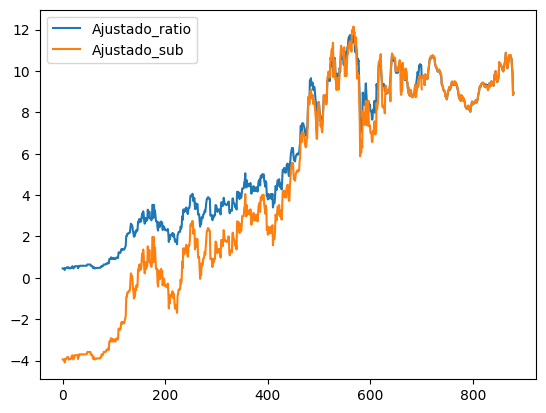

In [164]:
comp[['Ajustado_ratio', 'Ajustado_sub']].plot()

In [254]:
# Em uma linha
pd.concat([pd.read_excel('Aplic_Aut_Mais_30102022.xlsx', sheet_name=sheet).iloc[:,:12] for sheet in pd.ExcelFile('Aplic_Aut_Mais_30102022.xlsx').sheet_names if sheet[:6] == 'AAMais'], ignore_index=True)

,Cod.Ativo,Valor Aplicado,Valor Presente,Prazo,Emissão,Vencto,Tx Anual % CDI,Aliquota % Vigente,Fator CDI,Saldo,Diferença,Diferença %
0,6337978,$40835.37,$41038.20,248,19/05/2022,20/08/2022,0.01,0.37,1.104794,$7032.79,0.000000,0
1,126301,$70586.20,$52476.41,817,07/10/2022,12/07/2022,0.92,0.11,1.220138,$8534.23,0.000000,0
2,4087552,$80021.19,$86907.08,847,16/12/2021,16/06/2022,0.28,0.64,1.669628,$8501.41,0.000000,0
3,4123589,$37397.82,$55427.51,596,11/07/2022,25/08/2022,0.86,0.30,1.174145,$3407.50,0.000000,0
4,5958951,$69152.59,$1522.91,460,05/12/2021,09/05/2022,0.54,0.03,1.871065,$2629.42,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2335467,$69918.12,$13080.35,222,30/09/2022,08/09/2022,0.16,0.99,1.126483,$8545.59,0.783524,0
5996,2809170,$38546.51,$52677.47,294,24/11/2021,24/02/2022,0.06,0.02,1.708527,$3495.91,0.396803,0
5997,3839366,$85117.32,$58708.37,349,17/02/2022,05/10/2022,0.76,0.69,1.077067,$9431.70,0.378734,0
5998,2446047,$71154.26,$86707.68,746,03/01/2022,08/03/2022,0.72,0.01,1.139392,$2563.04,0.335282,0


In [251]:
# Em duas linhas para ficar mais "readble"
sheets = pd.ExcelFile('Aplic_Aut_Mais_30102022.xlsx').sheet_names
teste = pd.concat([pd.read_excel('Aplic_Aut_Mais_30102022.xlsx', sheet_name=sheet).iloc[:,:12] for sheet in sheets if sheet[:6] == 'AAMais'], ignore_index=True)
teste


,Cod.Ativo,Valor Aplicado,Valor Presente,Prazo,Emissão,Vencto,Tx Anual % CDI,Aliquota % Vigente,Fator CDI,Saldo,Diferença,Diferença %
0,6337978,$40835.37,$41038.20,248,19/05/2022,20/08/2022,0.01,0.37,1.104794,$7032.79,0.000000,0
1,126301,$70586.20,$52476.41,817,07/10/2022,12/07/2022,0.92,0.11,1.220138,$8534.23,0.000000,0
2,4087552,$80021.19,$86907.08,847,16/12/2021,16/06/2022,0.28,0.64,1.669628,$8501.41,0.000000,0
3,4123589,$37397.82,$55427.51,596,11/07/2022,25/08/2022,0.86,0.30,1.174145,$3407.50,0.000000,0
4,5958951,$69152.59,$1522.91,460,05/12/2021,09/05/2022,0.54,0.03,1.871065,$2629.42,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2335467,$69918.12,$13080.35,222,30/09/2022,08/09/2022,0.16,0.99,1.126483,$8545.59,0.783524,0
5996,2809170,$38546.51,$52677.47,294,24/11/2021,24/02/2022,0.06,0.02,1.708527,$3495.91,0.396803,0
5997,3839366,$85117.32,$58708.37,349,17/02/2022,05/10/2022,0.76,0.69,1.077067,$9431.70,0.378734,0
5998,2446047,$71154.26,$86707.68,746,03/01/2022,08/03/2022,0.72,0.01,1.139392,$2563.04,0.335282,0


In [258]:
import pandas as pd
import json
import requests


In [261]:
url = 'https://dados.susep.gov.br/olinda/servico/informacoescontabeis/versao/v1/odata/ContabeisAtivo(Ano=@Ano)?@Ano=%272016%27&$format=json'

r = requests.get(url)
r


SSLError: HTTPSConnectionPool(host='dados.susep.gov.br', port=443): Max retries exceeded with url: /olinda/servico/informacoescontabeis/versao/v1/odata/ContabeisAtivo(Ano=@Ano)?@Ano=%272016%27&$format=json (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)')))

In [262]:
url = 'https://www2.susep.gov.br/menuestatistica/SES/resp_balanco.aspx'
pd.read_html(url)

[                                                   0
 0  SES - Sistema de EstatÃ­sticas da SUSEP  versã...,
                                          0
 0  SES - Sistema de EstatÃ­sticas da SUSEP,
                                                    0  \
 0                                         versão 4.0   
 1  Erro: Procedure or function 'spu_passa_query' ...   
 2                                             Voltar   
 
                                                    1  
 0                                         versão 4.0  
 1  Erro: Procedure or function 'spu_passa_query' ...  
 2  Obs: O arquivo exportado terá terminaÃ§Ã£o .xl...  ,
     0   1
 0 NaN NaN,
                            0
 0  Empresas selecionadas Mês,
                            0
 0  Empresas selecionadas Mês,
                        0   1
 0  Empresas selecionadas NaN
 1                    Mês NaN]